#Intro:
In this project, I will be analyzing data from AirBnB. I will be looking at the data for Seattle and Boston and address three key questions with the data using the CRISP-DM Process (Cross Industry Process for Data Mining)

#CRISP-DM
**Business Understanding** <br>
I will be evaluating the data for my company that uses Airbnb services a lot for our workers who travel often. Since we are a startup, we are on a budget. They assigned me the task of analyzing the data and determine when and were would be the best time and place to book on Airbnb. <br>
**Question 1:** 
Our first question to address is does the season / month effect the price of listing? If so, which season / month is the most profitable? Which ones are least profitable?

##Data Understanding
**Gathering Data:**

In [0]:
import pandas as pd
import plotly.graph_objects as go

boston_calendar = pd.read_csv('boston_calendar.csv')
seattle_calendar = pd.read_csv('seattle_calendar.csv')

In [0]:
#Function for displaying Pie Chart
def pie_chart(labels, values, title):
  """
  This function is used to create a pie chart.

  Arguments:
      labels: the items that you are graphing
      values: the values of the items you are graphing
      title: string of title for the pie chart

  Returns:
      None
  """
  fig = go.Figure(data=[go.Pie(labels=labels, values=values, textinfo='label+percent')])
  fig.update_layout(title={'text':title,
                          'y':0.9,'x':.61,
                          'xanchor': 'right'})
  fig.show()

##Preparing Data
**Assessing Data:**

In [134]:
boston_calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1308890 entries, 0 to 1308889
Data columns (total 4 columns):
listing_id    1308890 non-null int64
date          1308890 non-null object
available     1308890 non-null object
price         643037 non-null object
dtypes: int64(1), object(3)
memory usage: 39.9+ MB


In [135]:
seattle_calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
listing_id    1393570 non-null int64
date          1393570 non-null object
available     1393570 non-null object
price         934542 non-null object
dtypes: int64(1), object(3)
memory usage: 42.5+ MB


In [136]:
boston_calendar.head()

,listing_id,date,available,price
0,12147973,2017-09-05,f,NaN
1,12147973,2017-09-04,f,NaN
2,12147973,2017-09-03,f,NaN
3,12147973,2017-09-02,f,NaN
4,12147973,2017-09-01,f,NaN


Result: The data for this one is pretty straight forward. We are only interest in the data where there is availibility, which therefore is associated with a price. 

**Cleaning Data:**

In [137]:
# Add location column to Boston dataframe
boston_calendar['location'] = 'Boston'
boston_calendar

,listing_id,date,available,price,location
0,12147973,2017-09-05,f,NaN,Boston
1,12147973,2017-09-04,f,NaN,Boston
2,12147973,2017-09-03,f,NaN,Boston
3,12147973,2017-09-02,f,NaN,Boston
4,12147973,2017-09-01,f,NaN,Boston
...,...,...,...,...,...
1308885,14504422,2016-09-10,f,NaN,Boston
1308886,14504422,2016-09-09,f,NaN,Boston
1308887,14504422,2016-09-08,f,NaN,Boston
1308888,14504422,2016-09-07,f,NaN,Boston


In [138]:
# Add location column to Seattle dataframe
seattle_calendar['location'] = 'Seattle'
seattle_calendar

,listing_id,date,available,price,location
0,241032,2016-01-04,t,$85.00,Seattle
1,241032,2016-01-05,t,$85.00,Seattle
2,241032,2016-01-06,f,NaN,Seattle
3,241032,2016-01-07,f,NaN,Seattle
4,241032,2016-01-08,f,NaN,Seattle
...,...,...,...,...,...
1393565,10208623,2016-12-29,f,NaN,Seattle
1393566,10208623,2016-12-30,f,NaN,Seattle
1393567,10208623,2016-12-31,f,NaN,Seattle
1393568,10208623,2017-01-01,f,NaN,Seattle


In [139]:
# Append both calendars together into one dataframe
calendar = boston_calendar.append(seattle_calendar)
calendar

,listing_id,date,available,price,location
0,12147973,2017-09-05,f,NaN,Boston
1,12147973,2017-09-04,f,NaN,Boston
2,12147973,2017-09-03,f,NaN,Boston
3,12147973,2017-09-02,f,NaN,Boston
4,12147973,2017-09-01,f,NaN,Boston
...,...,...,...,...,...
1393565,10208623,2016-12-29,f,NaN,Seattle
1393566,10208623,2016-12-30,f,NaN,Seattle
1393567,10208623,2016-12-31,f,NaN,Seattle
1393568,10208623,2017-01-01,f,NaN,Seattle


In [140]:
# Create month column from date
calendar['month'] = pd.DatetimeIndex(calendar['date']).month
calendar

,listing_id,date,available,price,location,month
0,12147973,2017-09-05,f,NaN,Boston,9
1,12147973,2017-09-04,f,NaN,Boston,9
2,12147973,2017-09-03,f,NaN,Boston,9
3,12147973,2017-09-02,f,NaN,Boston,9
4,12147973,2017-09-01,f,NaN,Boston,9
...,...,...,...,...,...,...
1393565,10208623,2016-12-29,f,NaN,Seattle,12
1393566,10208623,2016-12-30,f,NaN,Seattle,12
1393567,10208623,2016-12-31,f,NaN,Seattle,12
1393568,10208623,2017-01-01,f,NaN,Seattle,1


In [0]:
# Remove all symbols from price
calendar['price'] = calendar['price'].str.replace(r'\D', '')

In [142]:
# Drop all nan since they were not listed and convert price to int
calendar.dropna(axis=0, subset=['price'], inplace=True)
calendar['price'] = calendar['price'].astype(int)
calendar

,listing_id,date,available,price,location,month
365,3075044,2017-08-22,t,6500,Boston,8
366,3075044,2017-08-21,t,6500,Boston,8
367,3075044,2017-08-20,t,6500,Boston,8
368,3075044,2017-08-19,t,7500,Boston,8
369,3075044,2017-08-18,t,7500,Boston,8
...,...,...,...,...,...,...
1393207,10208623,2016-01-06,t,8700,Seattle,1
1393208,10208623,2016-01-07,t,8700,Seattle,1
1393211,10208623,2016-01-10,t,8700,Seattle,1
1393212,10208623,2016-01-11,t,8700,Seattle,1


In [143]:
# Divide by 100 to convert cents to dollar
calendar['price'] = calendar['price'] / 100
calendar

,listing_id,date,available,price,location,month
365,3075044,2017-08-22,t,65.0,Boston,8
366,3075044,2017-08-21,t,65.0,Boston,8
367,3075044,2017-08-20,t,65.0,Boston,8
368,3075044,2017-08-19,t,75.0,Boston,8
369,3075044,2017-08-18,t,75.0,Boston,8
...,...,...,...,...,...,...
1393207,10208623,2016-01-06,t,87.0,Seattle,1
1393208,10208623,2016-01-07,t,87.0,Seattle,1
1393211,10208623,2016-01-10,t,87.0,Seattle,1
1393212,10208623,2016-01-11,t,87.0,Seattle,1


In [0]:
# Find average price of listing per month for both locations
seattle_month_price = calendar[calendar['location']== 'Seattle'].groupby('month')['price'].mean()
boston_month_price = calendar[calendar['location']== 'Boston'].groupby('month')['price'].mean()

In [145]:
seattle_month_price

month
1     122.912176
2     124.293927
3     128.644488
4     135.097005
5     139.538183
6     147.473137
7     152.094150
8     150.656594
9     143.255949
10    137.031939
11    135.688738
12    137.251835
Name: price, dtype: float64

In [146]:
boston_month_price

month
1     182.799671
2     180.961028
3     181.818742
4     197.252890
5     193.712295
6     196.535302
7     202.486309
8     203.330142
9     237.047727
10    233.416248
11    202.924416
12    192.601915
Name: price, dtype: float64

##Data Modeling:

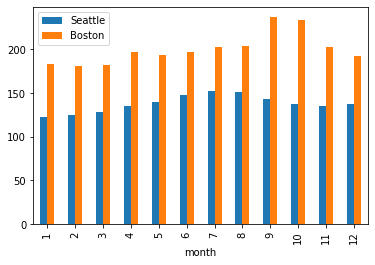

In [147]:
pd.concat({
    'Seattle': seattle_month_price, 'Boston': boston_month_price
}, axis=1).plot.bar();

##Evaluate Results <br>
Price flucuates through the year for both locations.

For Seattle, the winter months of Jan and Feb are the least profitable, while the summer months of June through August are the most profitable. Seattle lowest average price is &dollar;123 per listing in January and a high of &dollar;152 per listing in July.

For Boston, the winter months of Jan to Feb are the least profitable, while the fall months of Sept through Oct are the most profitable. Boston lowest average price is &dollar;182 per listing in Feburary and &dollar;237 per listing in September.

##Deploy
In making a financial business decision of when to list a property, it is recommended to list during peak season, which is July in Seattle and September in Boston.

#CRISP-DM
**Business Understanding** <br>
#Question 2: <br>
What percentage of the different types of listing on AirBnB?  Is there a property type that needs business focus?

##Data Understanding
**Gathering Data:**

In [0]:
seattle_listing = pd.read_csv('seattle_listings.csv')
boston_listing = pd.read_csv('boston_listings.csv')

##Preparing Data
**Assessing Data:**

In [149]:
seattle_listing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
id                                  3818 non-null int64
listing_url                         3818 non-null object
scrape_id                           3818 non-null int64
last_scraped                        3818 non-null object
name                                3818 non-null object
summary                             3641 non-null object
space                               3249 non-null object
description                         3818 non-null object
experiences_offered                 3818 non-null object
neighborhood_overview               2786 non-null object
notes                               2212 non-null object
transit                             2884 non-null object
thumbnail_url                       3498 non-null object
medium_url                          3498 non-null object
picture_url                         3818 non-null object
xl_picture_url                      3498

In [150]:
#For this question, we only need to look at the property type, so we will only use the column
seattle_listing = seattle_listing[['id', 'property_type']]
seattle_listing

,id,property_type
0,241032,Apartment
1,953595,Apartment
2,3308979,House
3,7421966,Apartment
4,278830,House
...,...,...
3813,8101950,House
3814,8902327,Apartment
3815,10267360,House
3816,9604740,Condominium


In [151]:
#Assess the data
seattle_listing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 2 columns):
id               3818 non-null int64
property_type    3817 non-null object
dtypes: int64(1), object(1)
memory usage: 59.8+ KB


**Cleaning Data:**

In [152]:
#Drop the one line that contains Null values
seattle_listing.dropna(inplace=True)
seattle_listing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3817 entries, 0 to 3817
Data columns (total 2 columns):
id               3817 non-null int64
property_type    3817 non-null object
dtypes: int64(1), object(1)
memory usage: 89.5+ KB


In [153]:
#Get values of the different property types
seattle_listing.property_type.value_counts()

House              1733
Apartment          1708
Townhouse           118
Condominium          91
Loft                 40
Bed & Breakfast      37
Other                22
Cabin                21
Camper/RV            13
Bungalow             13
Boat                  8
Tent                  5
Treehouse             3
Dorm                  2
Chalet                2
Yurt                  1
Name: property_type, dtype: int64

In [154]:
#Create dictionary for convert Property types to 3 unique value. 
#House and Townhouse are consider both houses, except townhouse shares a wall
#Condo's and apartments are the same. The only difference is ownership
#The rest are considered 'Others'
rooms = {'Townhouse': 'House',
         'Condominium': 'Apartment',
         'Loft': 'Other',
         'Bed & Breakfast': 'Other',
         'Cabin': 'Other',
         'Camper/RV': 'Other',
         'Bungalow': 'Other',
         'Boat': 'Other',
         'Tent': 'Other',
         'Treehouse': 'Other',
         'Dorm': 'Other',
         'Chalet': 'Other',
         'Yurt': 'Other',
         'Entire Floor': 'Other',
         'Villa': 'Other',
         'Guesthouse': 'Other'}
seattle_listing.replace({'property_type':rooms}, inplace=True)
seattle_listing.property_type.value_counts()

House        1851
Apartment    1799
Other         167
Name: property_type, dtype: int64

In [0]:
#Calculate total number of listing
total_listing = len(seattle_listing)

In [156]:
#Convert value counts to percentage by dividing by total counts
seattle_prop = seattle_listing.property_type.value_counts()
seattle_prop = seattle_prop / total_listing
seattle_prop

House        0.484936
Apartment    0.471313
Other        0.043752
Name: property_type, dtype: float64

##Data Modeling:

In [157]:
pie_chart(seattle_prop.index, seattle_prop.values, 'Seattle AirBnB Property Types')

##Preparing Data
**Assessing Data:**

In [158]:
#Repeat process for Boston
boston_listing = boston_listing[['id', 'property_type']]
boston_listing.property_type.value_counts()

Apartment          2612
House               562
Condominium         231
Townhouse            54
Bed & Breakfast      41
Loft                 39
Other                17
Boat                 12
Villa                 6
Entire Floor          4
Dorm                  2
Guesthouse            1
Camper/RV             1
Name: property_type, dtype: int64

In [159]:
boston_listing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 2 columns):
id               3585 non-null int64
property_type    3582 non-null object
dtypes: int64(1), object(1)
memory usage: 56.1+ KB


**Cleaning Data:**

In [160]:
boston_listing.dropna(inplace=True)
boston_listing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3582 entries, 0 to 3584
Data columns (total 2 columns):
id               3582 non-null int64
property_type    3582 non-null object
dtypes: int64(1), object(1)
memory usage: 84.0+ KB


In [161]:
#Convert property types to 3 different categories: House, Apartment, Other
boston_listing.replace({'property_type':rooms}, inplace=True)
boston_listing.property_type.value_counts()

Apartment    2843
House         616
Other         123
Name: property_type, dtype: int64

In [162]:
#Calculate total number of listing
total_listing = len(boston_listing)
total_listing

3582

In [163]:
#Convert value counts to percentage by dividing by total counts
boston_prop = boston_listing.property_type.value_counts()
boston_prop = boston_prop / total_listing
boston_prop

Apartment    0.793691
House        0.171971
Other        0.034338
Name: property_type, dtype: float64

##Data Modeling:

In [164]:
pie_chart(boston_prop.index, boston_prop.values, 'Boston AirBnB Property Types')

##Evaluate Results
Seattle and Boston are vastly different when it comes to the make up of property types. For Seattle, it is about equally the same in terms of the percentage of Home and Apartment listings, with both around 48% each, while only 4% falls under the category of other.  As for Boston, also 80% of the listing are Apartments. Only 17% falls under the House property type. That is much lower than Seattle.

##Deploy
Both locations has around 96% of their properties that are listing as either Homes or Apartments.  Seattle has a even split between homes and apartments, while Boston has a low percentage of home listing. There could be business opportunties for getting more homes listed on Airbnb. Also, Airbub has a large potentional market for listings that are not your tradition homes and apartments. Things like treehouse, yurt, Rv's could be used to attract more customers.

#CRISP-DM
**Business Understanding** <br>
#Question 3: <br>
What factors effects the price of the listing?

##Data Understanding
**Gathering Data:**

In [165]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
%matplotlib inline

seattle_listing = pd.read_csv('seattle_listings.csv')
seattle_listing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
id                                  3818 non-null int64
listing_url                         3818 non-null object
scrape_id                           3818 non-null int64
last_scraped                        3818 non-null object
name                                3818 non-null object
summary                             3641 non-null object
space                               3249 non-null object
description                         3818 non-null object
experiences_offered                 3818 non-null object
neighborhood_overview               2786 non-null object
notes                               2212 non-null object
transit                             2884 non-null object
thumbnail_url                       3498 non-null object
medium_url                          3498 non-null object
picture_url                         3818 non-null object
xl_picture_url                      3498

##Preparing Data
**Assessing Data:**

In [166]:
seattle_listing.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,...,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,NaN,NaN,NaN,NaN,https://a1.muscache.com/ac/pictures/67560560/c...,NaN,956883,https://www.airbnb.com/users/show/956883,Maija,2011-08-11,"Seattle, Washington, United States","I am an artist, interior designer, and run a s...",within a few hours,96%,100%,f,https://a0.muscache.com/ac/users/956883/profil...,https://a0.muscache.com/ac/users/956883/profil...,Queen Anne,3.0,3.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Gilman Dr W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,...,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,$85.00,NaN,NaN,NaN,NaN,2,$5.00,1,365,4 weeks ago,t,14,41,71,346,2016-01-04,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ...",https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/im/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,5177328,https://www.airbnb.com/users/show/5177328,Andrea,2013-02-21,"Seattle, Washington, United States",Living east coast/left coast/overseas. Time i...,within an hour,98%,100%,t,https://a0.muscache.com/ac/users/5177328/profi...,https://a0.muscache.com/ac/users/5177328/profi...,Queen Anne,6.0,6.0,"['email', 'phone', 'facebook', 'linkedin', 're...",t,t,"7th Avenue West, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,...,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",NaN,$150.00,"$1,000.00","$3,000.00",$100.00,$40.00,1,$0.00,2,90,today,t,13,13,16,291,2016-01-04,43,2013-08-19,2015-12-29,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,Our house is located just 5 short blocks to To...,A bus stop is just 2 blocks away. Easy bus a...,NaN,NaN,

**Cleaning Data**

In [167]:
#Select some potential factors that may effect the price of listing
seattle_price = seattle_listing[['id', 'bedrooms', 'bathrooms', 'review_scores_rating', 'price']]
seattle_price

,id,bedrooms,bathrooms,review_scores_rating,price
0,241032,1.0,1.0,95.0,$85.00
1,953595,1.0,1.0,96.0,$150.00
2,3308979,5.0,4.5,97.0,$975.00
3,7421966,0.0,1.0,NaN,$100.00
4,278830,3.0,2.0,92.0,$450.00
...,...,...,...,...,...
3813,8101950,3.0,2.0,80.0,$359.00
3814,8902327,1.0,1.0,100.0,$79.00
3815,10267360,1.0,1.0,NaN,$93.00
3816,9604740,0.0,1.0,NaN,$99.00


In [168]:
seattle_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 5 columns):
id                      3818 non-null int64
bedrooms                3812 non-null float64
bathrooms               3802 non-null float64
review_scores_rating    3171 non-null float64
price                   3818 non-null object
dtypes: float64(3), int64(1), object(1)
memory usage: 149.3+ KB


In [169]:
# Remove all symbols from price
seattle_price['price'] = seattle_price['price'].str.replace(r'\D', '')
seattle_price['price'] = seattle_price['price'].astype(int)
seattle_price['price'] = seattle_price['price'] / 100

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stabl

In [170]:
#Fill NaN values with the mean value of the column
fill_mean = lambda col: col.fillna(col.mean())

seattle_price = seattle_price.apply(fill_mean, axis=0)
seattle_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 5 columns):
id                      3818 non-null int64
bedrooms                3818 non-null float64
bathrooms               3818 non-null float64
review_scores_rating    3818 non-null float64
price                   3818 non-null float64
dtypes: float64(4), int64(1)
memory usage: 149.3 KB


In [171]:
seattle_price

,id,bedrooms,bathrooms,review_scores_rating,price
0,241032,1.0,1.0,95.000000,85.0
1,953595,1.0,1.0,96.000000,150.0
2,3308979,5.0,4.5,97.000000,975.0
3,7421966,0.0,1.0,94.539262,100.0
4,278830,3.0,2.0,92.000000,450.0
...,...,...,...,...,...
3813,8101950,3.0,2.0,80.000000,359.0
3814,8902327,1.0,1.0,100.000000,79.0
3815,10267360,1.0,1.0,94.539262,93.0
3816,9604740,0.0,1.0,94.539262,99.0


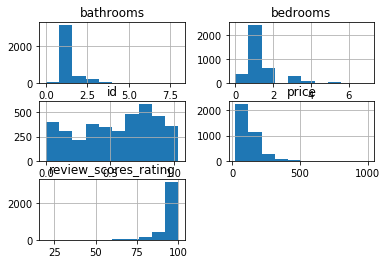

In [172]:
seattle_price.hist();

##Data Modeling:

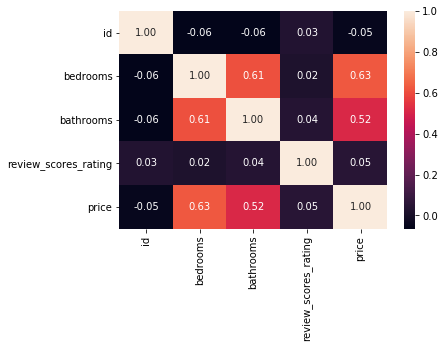

In [173]:
#Look at some potential correlation between Price and other factors
sns.heatmap(seattle_price.corr(), annot=True, fmt=".2f");

In [174]:

#Split into explanatory and response variables
X = seattle_price[['bedrooms', 'bathrooms', 'review_scores_rating']]
y = seattle_price['price']

#Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42) 

lm_model = LinearRegression(normalize=True) # Instantiate
lm_model.fit(X_train, y_train) #Fit
        
#Predict and score the model
y_test_preds = lm_model.predict(X_test) 
"The r-squared score for the model using only quantitative variables was {} on {} values.".format(r2_score(y_test, y_test_preds), len(y_test))

'The r-squared score for the model using only quantitative variables was 0.45611455864241 on 1146 values.'

In [175]:
seattle_neighborhood = seattle_listing[['id', 'neighbourhood', 'price']]
# Remove all symbols from price
seattle_neighborhood['price'] = seattle_neighborhood['price'].str.replace(r'\D', '')
seattle_neighborhood['price'] = seattle_neighborhood['price'].astype(int)
seattle_neighborhood['price'] = seattle_neighborhood['price'] / 100

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stabl

##Preparing Data
**Cleaning Data:**

In [0]:
#Filter out neighborhood that only has a few listings less than 5
seattle_neighborhood = seattle_neighborhood[seattle_neighborhood.groupby('neighbourhood')['neighbourhood'].transform('size') > 5]

In [0]:
#Arrange neighborhood by average price
neighbourhood = seattle_neighborhood.groupby('neighbourhood')['price'].mean()
neighbourhood.sort_values(ascending=False, inplace=True)

##Data Modeling:

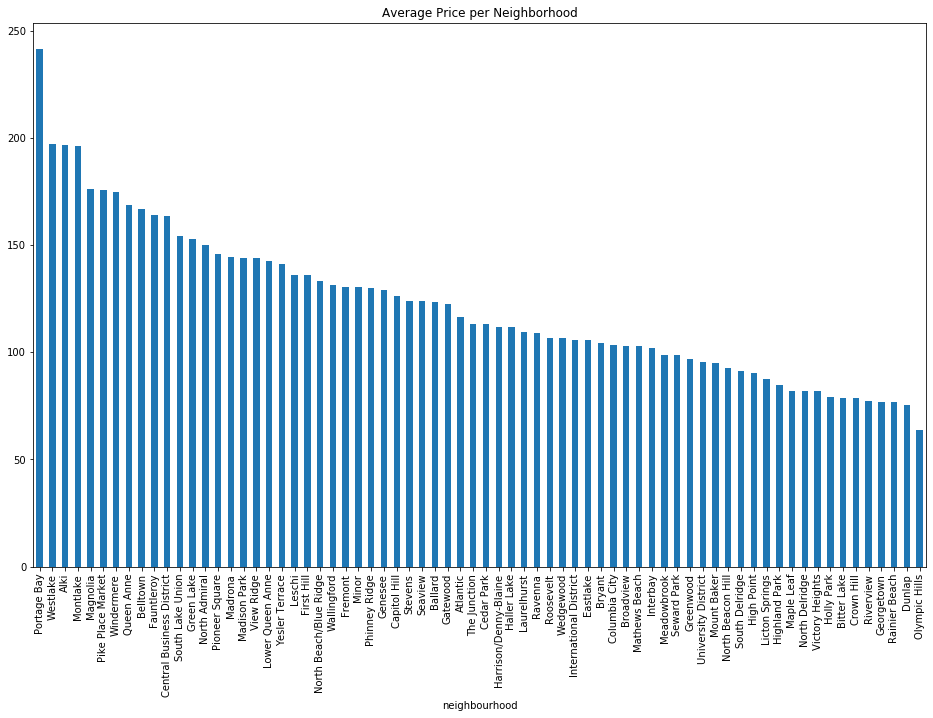

In [178]:
neighbourhood.plot(kind='bar', figsize=(16,10), title='Average Price per Neighborhood');

##Evaluate Results
For Seattle Listing, there is a clear correlation between neighborhood and price. For example, there is a vast difference between the top neighborhood and the bottom neighborhood. Portage Bay is more than 3 times the price as Olympic Hills. Also, Seattle provides a variety of pricing per neighborhood for different customer's budgets.

##Deploy
There is a clear correlation between Price and Neighborhood. For those who wants a good deal, look for Neighborhood like Rainier Beach, Dunlap, and Olympic Hills and avoid places like Portage Bay, Westlake, and Alki.